In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# Set the working directory and verify it
os.chdir('E:\\R\\Assignment A1a')
print(os.getcwd())


# Load required libraries
# These libraries should be installed using pip if not already present
# !pip install pandas numpy matplotlib seaborn

# Reading the file into Python
data = pd.read_csv("NSSO68.csv")



E:\R\Assignment A1a


C:\Users\mohit\AppData\Local\Temp\ipykernel_29680\1212169098.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


In [24]:
# Filtering for CHTSD
df = data[data['state_1'] == "CHTSD"]

# Display dataset info
print("Dataset Information:\n")
print(df.columns)
print(df.head())
print(df.shape)

# Finding missing values
missing_info = df.isna().sum()
print("Missing Values Information:\n")
print(missing_info)



Dataset Information:

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
      slno                                 grp  Round_Centre  FSU_number  \
1357  1358  41200000000000000481476571299840.0             1       41200   
1358  1359  41200000000000000481476571299840.0             1       41200   
1359  1360  41200000000000000481476571299840.0             1       41200   
1360  1361  41200000000000000481476571299840.0             1       41200   
1361  1362  41200000000000000481476571299840.0             1       41200   

      Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
1357     68               10       1       2     22           222  ...   
1358     68               10 

In [25]:
# Subsetting the data
chtsdnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

# Impute missing values with mean for specific columns
chtsdnew['Meals_At_Home'] = chtsdnew['Meals_At_Home'].fillna(chtsdnew['Meals_At_Home'].mean())

# Finding outliers and removing them
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    return df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]

outlier_columns = ["ricepds_v", "chicken_q"]
for col in outlier_columns:
    chtsdnew = remove_outliers(chtsdnew, col)



C:\Users\mohit\AppData\Local\Temp\ipykernel_29680\1939185543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chtsdnew['Meals_At_Home'] = chtsdnew['Meals_At_Home'].fillna(chtsdnew['Meals_At_Home'].mean())


In [26]:
# Summarize consumption
chtsdnew['total_consumption'] = chtsdnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

# Summarize and display top consuming districts and regions
def summarize_consumption(df, group_col):
    summary = df.groupby(group_col)['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)
    return summary

district_summary = summarize_consumption(chtsdnew, 'District')
region_summary = summarize_consumption(chtsdnew, 'Region')

print("Top Consuming Districts:\n")
print(district_summary.head(4))
print("Region Consumption Summary:\n")
print(region_summary)



Top Consuming Districts:

    District  total_consumption
10        11        1530.338289
9         10        1503.413102
1          2        1367.023922
6          7         967.668297
Region Consumption Summary:

   Region  total_consumption
1       2        8800.393114
2       3        2369.273470
0       1        1817.004637


In [27]:
# Rename districts and sectors
district_mapping = {"1": "Koriya", "2": "Surguja", "3": "Jashpur", "4": "Raigarh", "5": "Korba", "6": "Janjgir - Champa", "7": "Bilaspur", "8": "Kawardha", "9": "Rajnandgaon", "10": "Durg", "11": "Raipur", "12": "Mahasamund", "13": "Dhamtari", "14": "Kanker", "15": "Bastar", "16": "Dantewada", "17": "Narayanpur", "18": "Bijapur"}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

chtsdnew['District'] = chtsdnew['District'].astype(str).map(district_mapping)
chtsdnew['Sector'] = chtsdnew['Sector'].astype(str).map(sector_mapping)

# View data
print(chtsdnew.head())




     state_1 District  Region Sector  State_Region  Meals_At_Home  ricepds_v  \
1357   CHTSD     Durg       2  URBAN           222           60.0        0.0   
1358   CHTSD     Durg       2  URBAN           222           54.0        0.0   
1360   CHTSD     Durg       2  URBAN           222           60.0        0.0   
1361   CHTSD     Durg       2  URBAN           222           40.0        0.0   
1362   CHTSD     Durg       2  URBAN           222           60.0        0.0   

      Wheatpds_q  chicken_q  pulsep_q  wheatos_q  No_of_Meals_per_day  \
1357        0.00   0.600000       0.0   4.000000                  2.0   
1358        0.00   0.250000       0.0   5.000000                  2.0   
1360        0.00   0.500000       0.0   1.666667                  2.0   
1361        1.75   0.000000       0.0   0.000000                  2.0   
1362        0.00   0.166667       0.0   1.666667                  2.0   

      total_consumption  
1357           4.600000  
1358           5.250000  
13

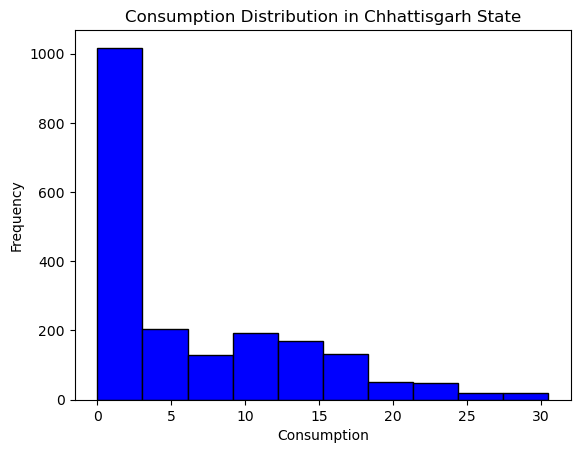

In [28]:
# Plot histogram
plt.hist(chtsdnew['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.title("Consumption Distribution in Chhattisgarh State")
plt.show()



In [29]:
# Summarize and plot total consumption per district
CHTSD_consumption = chtsdnew.groupby('District')['total_consumption'].sum().reset_index()



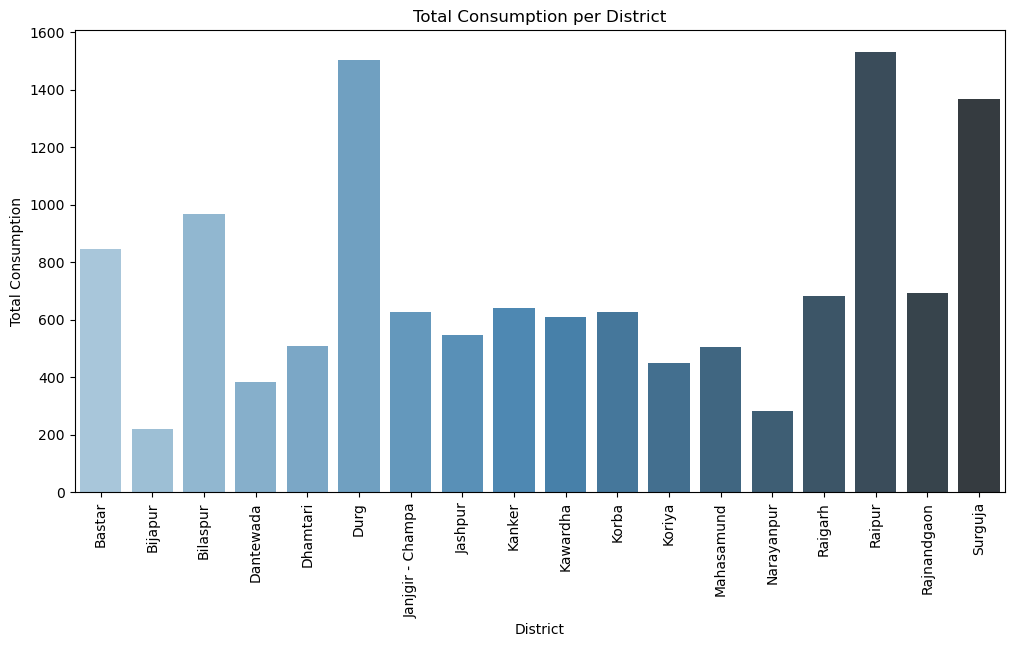

In [30]:
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='total_consumption', data=CHTSD_consumption, palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel("District")
plt.ylabel("Total Consumption")
plt.title("Total Consumption per District")
plt.show()

Part B

In [31]:
#pip install geopandas

In [32]:
#import geopandas as gpd
#import pandas as pd
#import matplotlib.pyplot as plt

# Read the GeoJSON file
data_map = gpd.read_file("E:\\R\\Assignment 5\\CHHATTISGARH_DISTRICTS.geojson")

# Display the data
print(data_map.head())



   OBJECTID                    dtname        stname stcode11 dtcode11  \
0         5                Mahasamund  CHHATTISGARH       22      411   
1        26       Uttar Bastar Kanker  CHHATTISGARH       22      413   
2        36                Narayanpur  CHHATTISGARH       22      415   
3       128  Dakshin Bastar Dantewada  CHHATTISGARH       22      416   
4       129                    Bastar  CHHATTISGARH       22      414   

  year_stat  test  Dist_LGD  State_LGD     Shape_Leng  Shape.STArea()  \
0    2011_c     1       385         22  574717.876981        0.413842   
1    2011_c     1       381         22  701122.905443        0.621114   
2    2011_c     1       637         22  457517.082405        0.335019   
3    2011_c     1       376         22  527174.211303        0.280109   
4    2011_c     1       374         22  571351.527970        0.479867   

   Shape.STLength()                                           geometry  
0          4.987379  POLYGON ((82.87711 21.55634,

In [33]:
# Rename the column 'dtname' to 'District'
data_map = data_map.rename(columns={'dtname': 'District'})


CHTSD_consumption = pd.DataFrame({
    'District': districts,
    'total_consumption': consumption_values
})



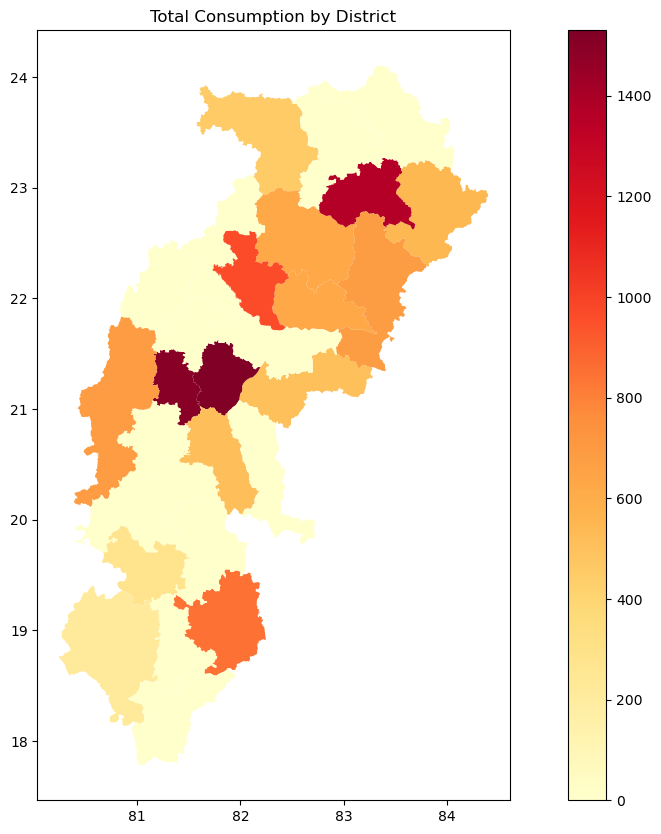

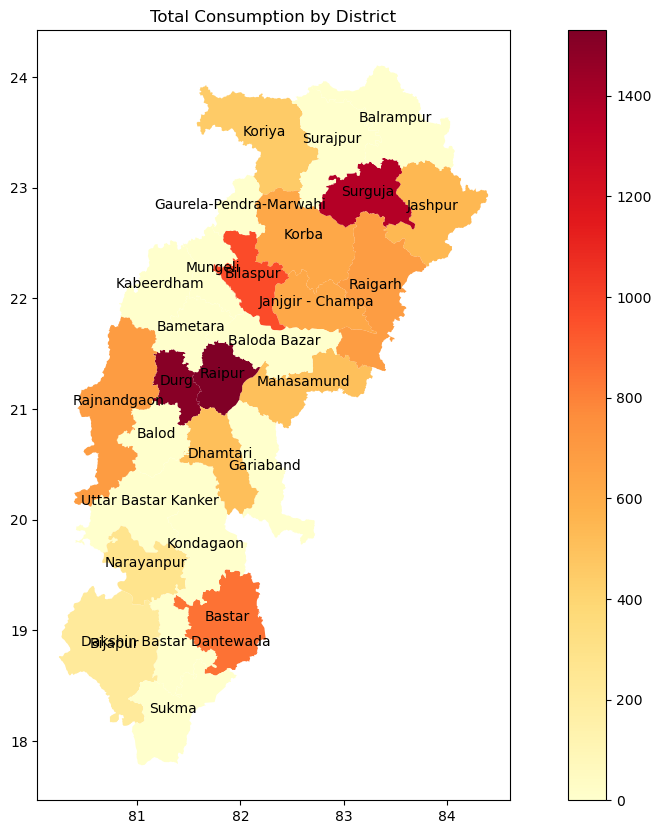

In [34]:
# Merge the data based on 'District'
data_map_data = data_map.merge(CHTSD_consumption, on='District', how='left')

# Replace missing values in total_consumption with 0
data_map_data['total_consumption'].fillna(0, inplace=True)

# Plot using GeoPandas and Matplotlib
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
data_map_data.plot(column='total_consumption', ax=ax, legend=True, cmap='YlOrRd')
plt.title("Total Consumption by District")
plt.show()

# Annotate districts with their names
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
data_map_data.plot(column='total_consumption', ax=ax, legend=True, cmap='YlOrRd')
data_map_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.title("Total Consumption by District")
plt.show()
